In [4]:
import os
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# File input/output
wav_filename = 'Drive_ori.wav'
mp3_filename = 'Drive_converted.mp3'

# Kompresi dari WAV ke MP3
audio = AudioSegment.from_wav(wav_filename)
audio.export(mp3_filename, format="mp3", bitrate="128k")
print(f"File '{wav_filename}' berhasil dikompresi ke '{mp3_filename}'.")

# Perbandingan ukuran file
wav_size = os.path.getsize(wav_filename) / 1024
mp3_size = os.path.getsize(mp3_filename) / 1024
print(f"\nUkuran File Asli (WAV): {wav_size:.2f} KB")
print(f"Ukuran File Kompresi (MP3): {mp3_size:.2f} KB")
print(f"Rasio Kompresi: {wav_size/mp3_size:.2f}:1")

# Baca WAV
sample_rate_wav, data_wav = wavfile.read(wav_filename)
if data_wav.ndim > 1:
    data_wav = data_wav[:, 0]

# Baca MP3
audio_mp3 = AudioSegment.from_mp3(mp3_filename)
sample_rate_mp3 = audio_mp3.frame_rate
data_mp3 = np.array(audio_mp3.get_array_of_samples())
if audio_mp3.channels == 2:
    data_mp3 = data_mp3.reshape((-1, 2))[:, 0]

# Waktu
time_wav = np.linspace(0, len(data_wav) / sample_rate_wav, num=len(data_wav))
time_mp3 = np.linspace(0, len(data_mp3) / sample_rate_mp3, num=len(data_mp3))

# Fungsi untuk FFT
def compute_fft(data, rate):
    fft = np.fft.fft(data)
    freq = np.fft.fftfreq(len(fft), 1 / rate)
    return freq[:len(freq) // 2], np.abs(fft[:len(fft) // 2])

freq_wav, fft_wav = compute_fft(data_wav, sample_rate_wav)
freq_mp3, fft_mp3 = compute_fft(data_mp3, sample_rate_mp3)

File 'Drive_ori.wav' berhasil dikompresi ke 'Drive_converted.mp3'.

Ukuran File Asli (WAV): 5088.20 KB
Ukuran File Kompresi (MP3): 462.49 KB
Rasio Kompresi: 11.00:1


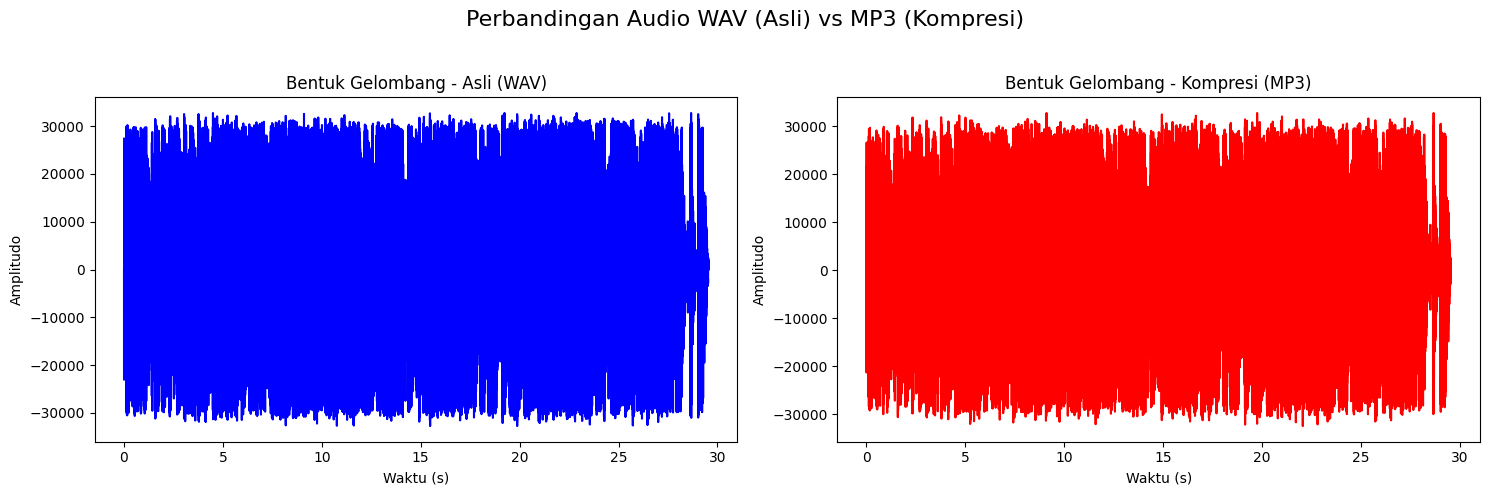

In [5]:
# Visualisasi Bentuk Gelombang
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Perbandingan Audio WAV (Asli) vs MP3 (Kompresi)', fontsize=16)

# Gelombang WAV
axs[0].plot(time_wav, data_wav, color='blue')
axs[0].set_title('Bentuk Gelombang - Asli (WAV)')
axs[0].set_xlabel('Waktu (s)')
axs[0].set_ylabel('Amplitudo')

# Gelombang MP3
axs[1].plot(time_mp3, data_mp3, color='red')
axs[1].set_title('Bentuk Gelombang - Kompresi (MP3)')
axs[1].set_xlabel('Waktu (s)')
axs[1].set_ylabel('Amplitudo')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

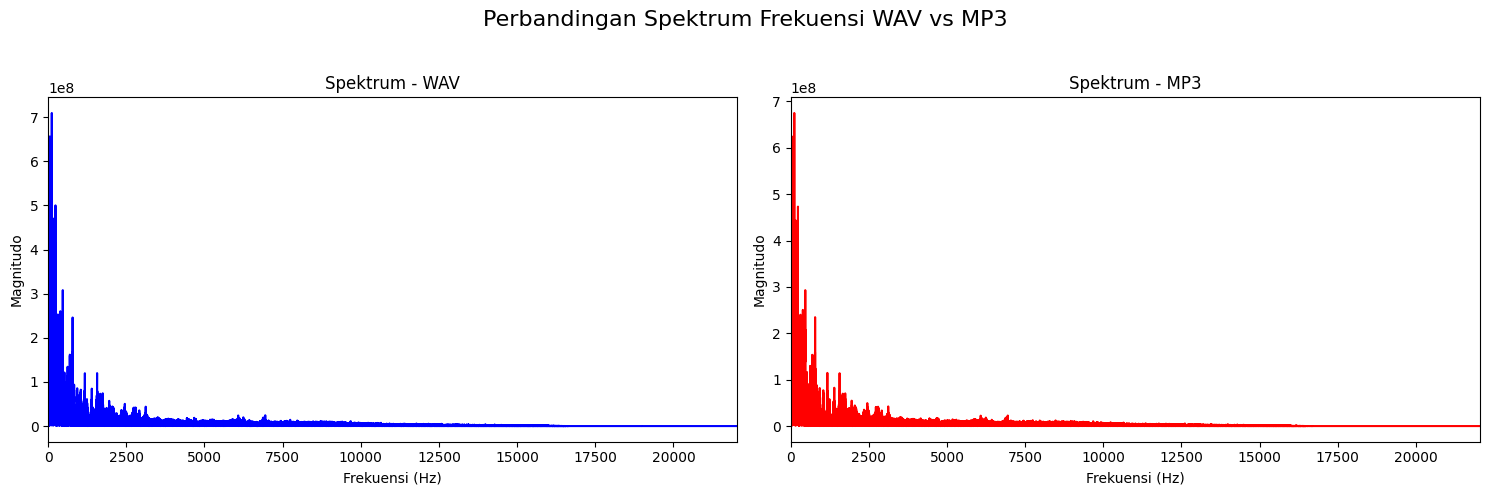

In [6]:
# Visualisasi Spektrum Frekuensi
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Perbandingan Spektrum Frekuensi WAV vs MP3', fontsize=16)

# Spektrum WAV
axs[0].plot(freq_wav, fft_wav, color='blue')
axs[0].set_title('Spektrum - WAV')
axs[0].set_xlabel('Frekuensi (Hz)')
axs[0].set_ylabel('Magnitudo')
axs[0].set_xlim([0, sample_rate_wav / 2])

# Spektrum MP3
axs[1].plot(freq_mp3, fft_mp3, color='red')
axs[1].set_title('Spektrum - MP3')
axs[1].set_xlabel('Frekuensi (Hz)')
axs[1].set_ylabel('Magnitudo')
axs[1].set_xlim([0, sample_rate_mp3 / 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()